# Logistic Regression(binary classification)

* 1) 지도학습 중, 데이터의 label(y값)이 0 혹은 1로 설정되는 유형의 학습을 의미한다.
* 2) 기존의 선형회귀방식으로 학습하고 예측하는 것이 불가하므로, 가설의 형태를 바꾸어 학습해야 한다.
* 3) 다중선형회귀 모형에서 직선(H = XW + b) 형태의 가설을 사용했다면, 로지스틱회귀 모형에서는 **0에서 1 사이의 값**을 가지는 함수로 가설을 표현한다. 그러한 함수를 **sigmoid 함수**라고 한다
* 4) 또한, binary classification부터는 정확도를 측정한다.

## 1. Sigmoid 함수

* 1) 가설의 형태가 linear인지 logistic인지 판단한다.
    (linear라면 linear regression 사용)

* 2) logistic이면 sigmoid함수를 이용해 hypothesis를 설정하고, 새로운 H를 구한다.
    -> 가설이 변경되었기 때문에, 해당 가설을 이용한 cost 함수를 이용하면 local minima(minimum)를 찾게 될 수도 있다.

* 3) 따라서, 가설이 변경됨에 따라 **cost 함수도 변경**해야 한다.
-> 수학식 이용
#### cost = -ylog(H) - (1-y)log(1-H)
-> y = 0일 때와 y = 1일 때 한 번에 나타내는 것

#### Sigmoid 함수의 그래프를 그려보자
f(x) = 1 / (1 + e **(-x))

* 0과 1에 점근하는 형태로 그려짐

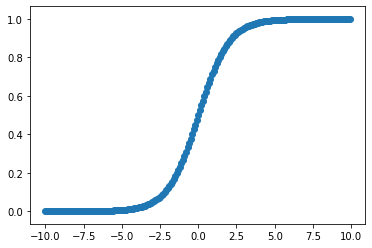

In [58]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))
plt.scatter(x,y)

### 1.1. 로지스틱 회귀 실습

#### Q) 공부 시간과 어학연수 기간에 따른 시험 합격 여부 예측
#### -> 어학연수를 7년 다녀오고, 7시간 공부하면 시험에 합격할까?

In [ ]:
# 사용할 데이터는
# 공부시간      어학연수기간   시험성적
#    1              1             0(Fail)
#    2              0             0
#    5              1             0
#    2              3             1(Pass)
#    3              3             1
#    8             1              1
#    10            0              1

In [16]:
# 1. 필요한 모듈 불러오기
import tensorflow as tf

# 2. training data set
# x에는 공부 시간과 어학연수 기간 모두 넣기
x_data = [[1,1],
         [2,0],
         [5,1],
         [2,3],
         [3,3],
         [8,1],
         [10,0]]
# y에는 시험 통과 여부
y_data = [[0],[0],[0],[1],[1],[1],[1]]

# 3. placeholder
X = tf.placeholder(shape = [None,2], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# 4. Weight, Bias 설정
W = tf.Variable(tf.random_normal([2,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 5. hypothesis 설정
# y가 0, 1로 나타내어지는 데이터셋의 형태이기 때문에, S자 형태의 sigmoid 함수를 이용한다.
logit = tf.matmul(X,W) + b
# 가설이 되기 전 -> 행렬곱만 해준 상태.
H = tf.sigmoid(logit)
# tensorflow 내의 sigmoid 함수를 이용해 가설을 설정한다.

# 6. cost function
# 일반적으로 tensorflow에서 제공하는 함수를 이용한다.
# discrete classification tasks in which each class is independent and not mutually exclusive.
# 참고 페이지: https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits?version=stable
cost= tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                            labels = Y))
# For brevity, let x = logits, z = labels.
# logits에 가설 넣는 게 아니라 logit을 넣는 것.
# label에 Y 넣으면
# 그걸 알아서 sigmoid로 계산하고,
# cost function으로 만든다.

# 7. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# 8. session 생성, 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 세션을 실행하는데, 변수 초기화하는 세션을 실행해라.

# 9. 학습 진행
for step in range(30000):
    _, cost_val = sess.run([train, cost],
                          feed_dict ={
                              X : x_data,
                              Y : y_data
                          })
    if step % 3000 == 0:
        print("cost 값은 : {}".format(cost_val))
        
# cost 값 0.02 정도까지 떨어진다. -> 이 정도면 괜찮게 학습되었다고 판단.

# 10. 예측 진행(prediction)
result = sess.run(H, feed_dict = {X : [[7,1]]})
print(result)                 # 93퍼센트 정도 합격할 것.
if result > 0.5 :
    print("시험에 합격 : {}".format(result))
else:
    print("시험에 불합격 : {}".format(result))

cost 값은 : 0.6048927307128906
cost 값은 : 0.11616965383291245
cost 값은 : 0.07662037760019302
cost 값은 : 0.05687626823782921
cost 값은 : 0.045050621032714844
cost 값은 : 0.03721841797232628
cost 값은 : 0.03166886046528816
cost 값은 : 0.027540283277630806
cost 값은 : 0.024353373795747757
cost 값은 : 0.021821264177560806
[[0.9379553]]
시험에 합격 : [[0.9379553]]


### 1.2. 로지스틱 회귀 연습문제

#### Q) 대학원 입학시험에 대한 합격 여부 예측
* 전처리 단계 : rank의 경향성
* 이상치 처리

#### A) 틀렸다! *Cost*값 중구난방이다.

``` 
첫 번째 결과 : 30000, 0.01
cost값은 : 189.8178253173828
cost값은 : 1.7592873573303223
cost값은 : 6.497927188873291
cost값은 : 5.869077682495117
cost값은 : 6.773313999176025
cost값은 : 8.64787483215332
cost값은 : 10.574755668640137
cost값은 : 12.52682113647461
cost값은 : 14.489851951599121
cost값은 : 16.456096649169922 ```

```
두 번째 결과 : 30000, 0.1
cost값은 : 391.9734802246094
cost값은 : 7635.13623046875
cost값은 : 7617.27734375
cost값은 : 7576.896484375
cost값은 : 7534.650390625
cost값은 : 7491.50146484375
cost값은 : 7475.62890625
cost값은 : 7434.072265625
cost값은 : 7392.486328125
cost값은 : 7350.90234375
```


* minmax scale -> scale 다시 해보면?
* 이상치 처리 방식?

In [2]:
# 1. 필요한 라이브러리 import

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


,admit,gre,gpa,rank
0,0,380.0,3.61,2
1,1,660.0,3.67,2
2,1,800.0,4.00,4
3,1,640.0,3.19,1
4,0,520.0,2.93,1
...,...,...,...,...
395,0,620.0,4.00,3
396,0,560.0,3.04,2
397,0,460.0,2.63,3
398,0,700.0,3.65,3


cost값은 : 391.9734802246094
cost값은 : 7635.13623046875
cost값은 : 7617.27734375
cost값은 : 7576.896484375
cost값은 : 7534.650390625
cost값은 : 7491.50146484375
cost값은 : 7475.62890625
cost값은 : 7434.072265625
cost값은 : 7392.486328125
cost값은 : 7350.90234375


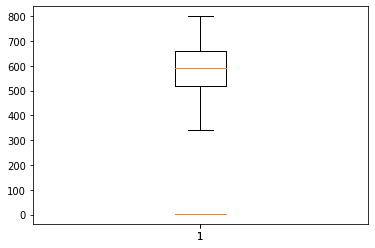

In [49]:
# 2. 데이터 준비

data_df = pd.read_csv("./data/admission.csv")
display(data_df)

# 2-1. EDA
data_df.info()
data_df.corr()

rank_mapping_dict = { 4 : 1, 3 : 2, 2 : 3, 1 : 4}
data_df["rank"] = data_df["rank"].map(rank_mapping_dict)

data_df

# 2-2. 결측치 확인 : 없음
data_df.isnull().sum()

# 2-3. 이상치 확인
# plt.boxplot(data_df["gre"]) # gre: 하위이상치 존재
# plt.boxplot(data_df["gpa"]) # gpa: 하위이상치 존재

# 2-4. gre 이상치 대체
gre_q1, gre_q3 = np.percentile(data_df["gre"], [25, 75])
iqr_gre = gre_q3 - gre_q1
gre_lower = gre_q1 - 1.5  * iqr_gre
gre_mean = data_df.loc[~(data_df["gre"]<gre_lower)]["gre"].mean()
data_df.loc[data_df["gre"]<gre_lower, "gre"] = gre_mean
plt.boxplot(data_df["gre"])

# 2-5. gpa 이상치 대체
gpa_q1, gpa_q3 = np.percentile(data_df["gpa"], [25, 75])
iqr_gpa = gpa_q3 - gpa_q1
gpa_lower = gpa_q1 - 1.5 * iqr_gpa
gpa_mean = data_df.loc[~(data_df["gpa"]<gpa_lower)]["gpa"].mean()
data_df.loc[data_df["gpa"]<gpa_lower, "gpa"] = gpa_mean
plt.boxplot(data_df["gpa"])

# 3. 학습

display(data_df)

# 3-1. x, y 데이터 준비
x_data = data_df[["gre","gpa","rank"]].values
y_data = data_df[["admit"]].values

# 3-2. placeholder
X = tf.placeholder(shape = [None, 3], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 3-3. W, b
W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 3-4. hypothesis
logit = tf.matmul(X, W) + b
H = tf.sigmoid(logit)

# 3-5. cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                              labels = Y))

# 3-6. train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 3-7. sess, initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 3-8. 학습
for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict = { X : x_data,
                                                      Y : y_data})
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

#### minmax scale 해본다면?

```
scale 후 돌린 세 번째 결과: 좀 낫다
cost값은 : 0.8171528577804565
cost값은 : 0.5742185115814209
cost값은 : 0.5737513899803162
cost값은 : 0.5737453699111938
cost값은 : 0.5737453103065491
cost값은 : 0.5737453699111938
cost값은 : 0.5737453699111938
cost값은 : 0.5737453699111938
cost값은 : 0.5737453699111938
cost값은 : 0.5737453699111938
```

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


,admit,gre,gpa,rank
0,0,380.0,3.61,2
1,1,660.0,3.67,2
2,1,800.0,4.00,4
3,1,640.0,3.19,1
4,0,520.0,2.93,1
...,...,...,...,...
395,0,620.0,4.00,3
396,0,560.0,3.04,2
397,0,460.0,2.63,3
398,0,700.0,3.65,3


cost값은 : 0.743462085723877
cost값은 : 0.5740522742271423
cost값은 : 0.5737507343292236
cost값은 : 0.5737454295158386
cost값은 : 0.5737453699111938
cost값은 : 0.5737453103065491
cost값은 : 0.5737453103065491
cost값은 : 0.5737453103065491
cost값은 : 0.5737453103065491
cost값은 : 0.5737453103065491
[[0.04361623]]
[[0.04361623]]의 확률로, 불합격했어요.


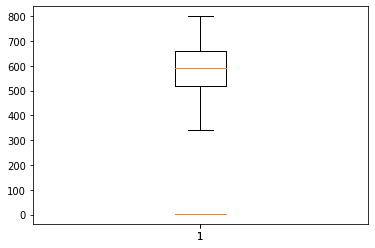

In [60]:
from sklearn.preprocessing import MinMaxScaler
# 모듈 설치 : pip install sklearn


# 2. 데이터 준비

data_df = pd.read_csv("./data/admission.csv")
display(data_df)

# 2-1. EDA
data_df.info()
data_df.corr()

rank_mapping_dict = { 4 : 1, 3 : 2, 2 : 3, 1 : 4}
data_df["rank"] = data_df["rank"].map(rank_mapping_dict)

data_df

# 2-2. 결측치 확인 : 없음
data_df.isnull().sum()

# 2-3. 이상치 확인
# plt.boxplot(data_df["gre"]) # gre: 하위이상치 존재
# plt.boxplot(data_df["gpa"]) # gpa: 하위이상치 존재

# 2-4. gre 이상치 대체
gre_q1, gre_q3 = np.percentile(data_df["gre"], [25, 75])
iqr_gre = gre_q3 - gre_q1
gre_lower = gre_q1 - 1.5  * iqr_gre
gre_mean = data_df.loc[~(data_df["gre"]<gre_lower)]["gre"].mean()
data_df.loc[data_df["gre"]<gre_lower, "gre"] = gre_mean
plt.boxplot(data_df["gre"])

# 2-5. gpa 이상치 대체
gpa_q1, gpa_q3 = np.percentile(data_df["gpa"], [25, 75])
iqr_gpa = gpa_q3 - gpa_q1
gpa_lower = gpa_q1 - 1.5 * iqr_gpa
gpa_mean = data_df.loc[~(data_df["gpa"]<gpa_lower)]["gpa"].mean()
data_df.loc[data_df["gpa"]<gpa_lower, "gpa"] = gpa_mean
plt.boxplot(data_df["gpa"])

# 3. 학습

display(data_df)

# 3-1. x, y 데이터 준비
x_data = data_df[["gre","gpa","rank"]].values
y_data = data_df[["admit"]].values


########## minmax scale ########################

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data = scaler.fit_transform(x_data)

# 3-2. placeholder
X = tf.placeholder(shape = [None, 3], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 3-3. W, b
W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 3-4. hypothesis
logit = tf.matmul(X, W) + b
H = tf.sigmoid(logit)

# 3-5. cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                              labels = Y))

# 3-6. train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 3-7. sess, initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 3-8. 학습
for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict = { X : x_data,
                                                      Y : y_data})
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))
        
# 3-9. 예측 : 660, 3.67, rank = 2일 때 예측 : rank = 2임에 주의.
predict_x_data = scaler.fit_transform([[660, 3.67, 3]])
result = sess.run(H, feed_dict = {X : predict_x_data})
print(result)
if result > 0.5 :
    print(f"{result}의 확률로, 합격했어요.")
else:
    print(f"{result}의 확률로, 불합격했어요.")

## 1.3. 정확도 측정
* 정확도 측정했을 때, 95% 이상이어야 실생활에서 사용할 수 있다.

* 1) 학습용 data set과 테스트용 data set으로 나눈다.
    * 나누지 않고, train data set을 test에 이용하면 이미 학습했기 때문에, 과적합의 문제가 일어난다.
* 2) predict한 결과를 알아 온다 - logistic이므로 결과는 모두 0, 1 중 하나로 나온다.
* 3) result 변수 저장 - H > 0.5일 때 True, 아니면 False.
* 4) tensorflow의 cast 함수를 이용해 result 값을 True일 때 1.0, False일 때 0.0으로 바꾼다.
    * tf.cast : 논리값을 실수값으로 바꾼다.
    * 예측값과 주어진 데이터의 값(이미 갖고 있는 Y data)이 같으면 True, 아니면 False.
    * 각각의 True를 1, False를 0으로 바꾼다.
* 5) 정확도 도출 : reduce_mean 함수 이용
    * 1, 0의 값을 평균 내면, 1이 몇 개 있는지 알 수 있어서 퍼센티지 값을 알 수 있다.

#### 연습문제 강사님 방식 + 정확도 측정하는 방법까지 함께 알아본다.
#### 결과적으로, 이 모델은 사용할 수 없는 모델이다.

In [73]:
# 1. 필요한 모듈
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# 2. data load

df = pd.read_csv("./Data/admission.csv")

## 2.1. data EDA, 전처리

# 1) rank

# 경향성을 봤더니 rank가 음의 경향을 가진다. 그래서 rank의 방향을 바꾼다.
# lambda 함수 이용한다.

def change_rank(x):
    if x == 4:
        return 1
    elif x == 3:
        return 2
    elif x == 2:
        return 1
    else:
        return 4
    
df["rank"] = df["rank"].apply(lambda x : change_rank(x))
display(df) # rank 변경됨.

# 2) 결측치 : 없음.
df.isnull().sum()

# 3) 이상치: 삭제할 것 + 함수 만들어서 한 번에 처리.
# boxplot 확인하는 게 좋지만, 애초에 그냥 함수 만들어서 처리해버리면 쉽다.

def process_outlier(tmp_df, tmp):
    q1, q3 = np.percentile(tmp, [25, 75])
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    mask_upper = tmp > upper
    mask_lower = tmp < lower
    tmp_df = tmp_df.loc[~(mask_upper | mask_lower)]    # not 붙으면 가운데가 &로 변하니까 주의
    return tmp_df

df = process_outlier(df, df["gre"])
df = process_outlier(df, df["gpa"])

# 3. 데이터 준비

# 3.1. x, y
train_x_data = df[["gre", "gpa", "rank"]].values
train_y_data = df["admit"].values.reshape(-1,1)

# 3.2. scale
train_x_data = MinMaxScaler().fit_transform(train_x_data)

# 4. 머신러닝

# 4.1. x, y data 준비
train_x_data
train_y_data

# 4.2. placeholder
X = tf.placeholder(shape = [None, 3], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 4.3. W, b
W = tf.Variable(tf.random_normal([3,1]), name = "Weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 4.4. hypothesis
logit = tf.matmul(X, W) +b
H = tf.sigmoid(logit)

# 4.5. cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                             labels = Y))

# 4.6. train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# 4.7. session, initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 4.8. learning
for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict = {X : train_x_data,
                                                      Y : train_y_data})
    if step % 3000 == 0:
        print(f"cost 값은 : {cost_val}")

# 4.9. 정확도 측정
# 지금은 train test 나누지 않았으므로 train용을 사용하는데, 원래는 이러면 안 된다.
predict = tf.cast(H > 0.5, dtype = tf.float32) # 0.5 조건으로 삼아서 실수값으로 바꿈.
correct = tf.equal(predict, Y) # predict, Y가 같은지 비교
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32)) # correct라는 변수를 실행해서 평균낸다.
result = sess.run(accuracy, feed_dict = {X : train_x_data,
                                         Y : train_y_data})
print(f"정확도는 {result}입니다.")

,admit,gre,gpa,rank
0,0,380,3.61,2
1,1,660,3.67,2
2,1,800,4.00,4
3,1,640,3.19,1
4,0,520,2.93,1
...,...,...,...,...
395,0,620,4.00,1
396,0,560,3.04,2
397,0,460,2.63,1
398,0,700,3.65,1


cost 값은 : 1.3421052694320679
cost 값은 : 0.6070732474327087
cost 값은 : 0.5969980955123901
cost 값은 : 0.5941833257675171
cost 값은 : 0.5931543707847595
cost 값은 : 0.5926678776741028
cost 값은 : 0.5924003720283508
cost 값은 : 0.5922430753707886
cost 값은 : 0.5921478867530823
cost 값은 : 0.5920897126197815
정확도는 0.703797459602356입니다.
